# Titanic – Machine Learning from Disaster

This idea of this teamwork is to implement step-by-step a classification analysis with Python’s data analysis and manipulation libraries like Pandas, NumPy, and Scikit-Learn.

The team size is 4 members.

The evaluation of the teamwork will happen by re-performing the analysis and evaluating the results in the presence of the instructor. Please, create a Jupyter Notebook that documents the aims of your project, describes the dataset, documents your data analysis process, and evaluates the results i.e. make the analysis self-descriptive by adding Markdown comments and by using descriptive variable names. The efforts of the individual team members will also be evaluated in the event.

Please, book a time for evaluation event for a week starting on Mon 25 April 2022. The 15 minutes long time slots will be published later in itsLearning.

Return the documented Jupyter Notebook or a link to its version control repository into the itsLearning return box no later than Friday 22 April 2022 at 16.00.

The commission:

This is directly from the kaggle datasets.

Your task is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

This is a binary classification problem: survived - not survived.

Please get acquainted with the data at https://www.kaggle.com/c/titanic

You can also find solutions and tutorials there to help you. They are on the Code tab.

Please note that the test set doesn't disclose the value of the target variable: Did the passenger survive or did he not. Use cross validation with your train set to evaluate your model.

At the end, you can submit your prediction based on the test set into the kaggle for evaluation according to the instruction given in Overview | Evaluation page. You must login first.

When returning the teamwork, let the instructor also know how your analysis was evaluated by kaggle if you uploaded data there.

To pass this work, you must:

1. Participate in using Python and some of its data analysis libraries.

2. Be active during the project.

3. Collect at least 0,5 grade units from the * marked tasks below.

### The tasks and the evaluation:

#### 1. Document the aims, decisions, and solutions of your data analysis directly into the Jupyter Notebook as the analysis proceeds. Make the document self-explanatory. (0,25 grade units)

#### 2. Divide your dataset into the train and test sets. (No points this time, Kaggle has done this to you).

I downloaded the datasets an put them in a datasets folder

#### 3. Describe your data. Calculate statistics, like means, standard deviations, and correlations. Draw diagrams, like histograms, scatter diagrams. Visualize correlations. (0,25 grade units)

### Imports

In [99]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

### Reading the data

In [4]:
# Reading the data for the train and test sets
train_set = pd.read_csv("./datasets/train.csv")
test_set = pd.read_csv("./datasets/test.csv")

## Calculations

In [5]:
# Using the describe function to describe the data, there is mean for mean std for standard deviation
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [132]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Calculating correlations using corr function from pandas
train_set.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


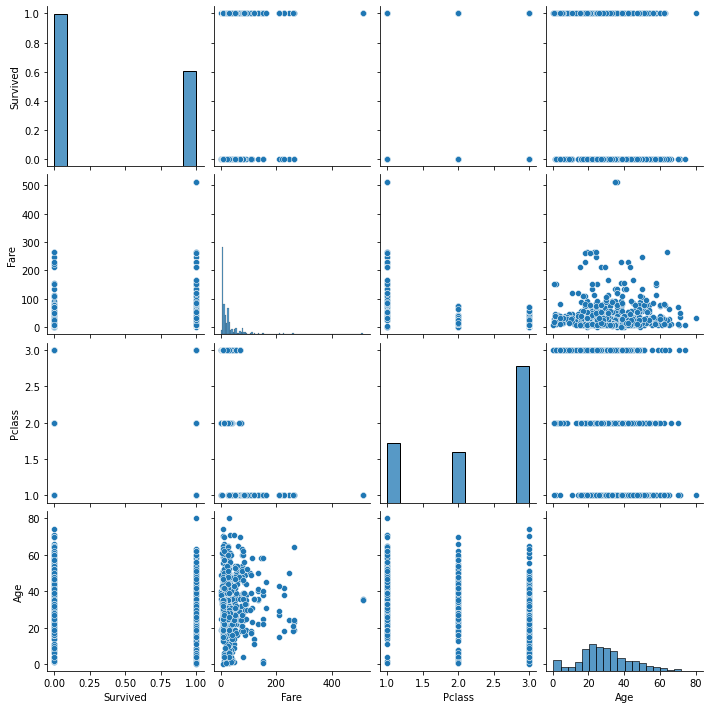

In [8]:
sns.pairplot(train_set, vars=["Survived", "Fare", "Pclass", "Age"])

## Diagrams

C:\Users\annuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


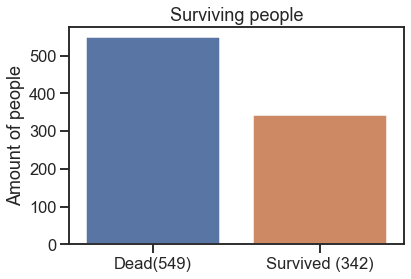

In [9]:
# Making variables for the amount of dead and survivors using the value_counts method on an index since there
# are only 2 possible situations
survivor_amount = train_set["Survived"].value_counts()[1]
dead_amount = train_set["Survived"].value_counts()[0]
# Creating the figure and giving it the width and height
plt.figure(figsize = (6,4))
# Controlling the scaling of plot elements using seaborn's set_context method
sns.set_context("talk")
# Shows the count of observations in survived category using bars, in this case dead and survived
sns.countplot(train_set["Survived"])
# Creating the title
plt.title("Surviving people")
# Creating label for the y-axis
plt.ylabel("Amount of people")
# Removing label from x-axis
plt.xlabel("")
# creating the locations and labels for the x-axis, using format method to make the int dead_amount and survivor
# amount inserted in to a string, location got by using {}
plt.xticks((0,1), ["Dead({})".format(dead_amount), "Survived ({})".format(survivor_amount)])
# Drawing the diagram
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Age'>

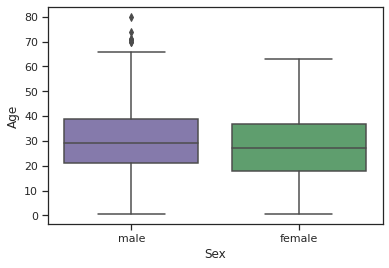

In [10]:
sns.set_theme(style="ticks")
sns.boxplot(x="Sex", y="Age", palette =["m","g"], data=train_set)

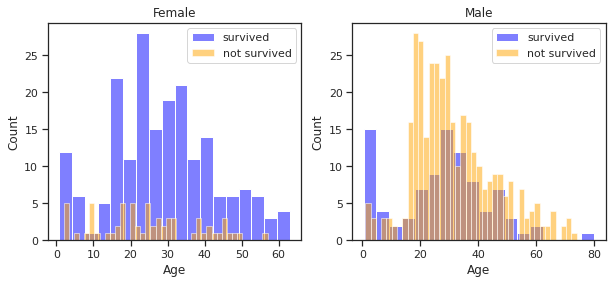

In [11]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_set[train_set['Sex']=='female']
men = train_set[train_set['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color = "blue", alpha = 0.5)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color = "orange", alpha = 0.5)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color = "blue", alpha = 0.5)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color = "orange", alpha = 0.5)
ax.legend()
_ = ax.set_title('Male')

In [12]:
data = [train_set, test_set]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_set['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

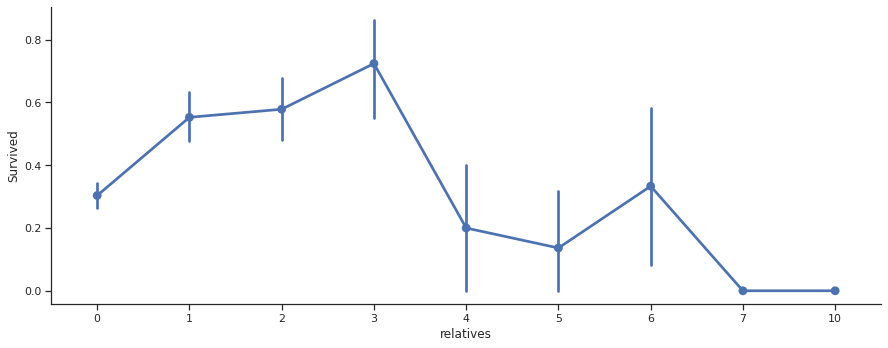

In [13]:
axes = sns.catplot(x = 'relatives',y = 'Survived', 
                      data=train_set, aspect = 2.5, kind = "point")

In [14]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


#### 4. * Prepare your data. When and if necessary, calculate new attributes, scale attributes, convert categorical variables into numeric variables. (0,25 grade units)

In [15]:
# creating a dict file 
gender = {"male": 1,"female": 2}
# Setting the values using a for loop and giving it items
train_set["Sex"] = [gender[item] for item in train_set["Sex"]]
test_set["Sex"] = [gender[item] for item in test_set["Sex"]]
print(train_set)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    2  38.0      1   
2                               Heikkinen, Miss. Laina    2  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    2  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [16]:
drop = ["Ticket", "PassengerId", "Fare", "Cabin", "Embarked", "Name"]
train_set.drop(drop, inplace=True, axis=1)
test_set.drop(drop, inplace= True, axis = 1)

In [17]:
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(train_set)

In [18]:
train_set = pd.DataFrame(X, columns=train_set.columns)

In [19]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    float64
 1   Pclass     891 non-null    float64
 2   Sex        891 non-null    float64
 3   Age        891 non-null    float64
 4   SibSp      891 non-null    float64
 5   Parch      891 non-null    float64
 6   relatives  891 non-null    float64
 7   not_alone  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


In [20]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    int64  
 2   Age        332 non-null    float64
 3   SibSp      418 non-null    int64  
 4   Parch      418 non-null    int64  
 5   relatives  418 non-null    int64  
 6   not_alone  418 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 23.0 KB


In [21]:
imputer2 = SimpleImputer(strategy='median')
Y = imputer.fit_transform(test_set)

In [22]:
test_set = pd.DataFrame(Y, columns=test_set.columns)

In [23]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    float64
 1   Sex        418 non-null    float64
 2   Age        418 non-null    float64
 3   SibSp      418 non-null    float64
 4   Parch      418 non-null    float64
 5   relatives  418 non-null    float64
 6   not_alone  418 non-null    float64
dtypes: float64(7)
memory usage: 23.0 KB


#### 5. * Train two different classification models. One of them should be Random Forest or SVM. You can select the other one by yourselves. (0,25)

SVM Model

In [143]:
X_train = train_set.drop("Survived", axis=1)
y_train = train_set["Survived"]
X_test  = test_set.drop("PassengerId", axis=1).copy()

In [144]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

In [145]:
svm_clf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

Pitää vielä testata mallia...

In [69]:
decision_tree = DecisionTreeClassifier(max_depth = 10, random_state=42, criterion="entropy", min_samples_leaf=15)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [70]:
print(acc_decision_tree)

84.62


#### 6. Select one of them for fine-tuning. Justify your selection with the results from suitable evaluation metrics. (0,25 grade units)

#### 7. Use cross-validation in the fine-tuning of your model. Test different hyperparameter combinations. (0,25 grade units)

In [101]:
decision_tree = DecisionTreeClassifier(max_depth = 17, random_state=42, criterion="gini")
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [102]:
print(acc_decision_tree)

91.69


In [103]:
predictions = cross_val_predict(decision_tree, X_train, y_train, cv=7)
ar = confusion_matrix(y_train, predictions)
print(ar)

[[473  76]
 [104 238]]


In [91]:
cross_val_score(decision_tree, X_train, y_train, cv = 7, scoring = "accuracy")

array([0.7421875 , 0.7890625 , 0.82677165, 0.81102362, 0.82677165,
       0.78740157, 0.80314961])

In [80]:
precision_score(y_train, predictions)

0.7579617834394905

In [87]:
recall_score(y_train, predictions)

0.695906432748538

In [88]:
f1_score(y_train, predictions)

0.7256097560975611

#### 8. Make predictions on the test set and send them to Kaggle for evaluation. (0,25 grade units)

#### 9. At the end of your Jupyter Notebook, evaluate how well does the model seem to reach your original aims? (0,25 grade units)

* You have to pass this criteria to get accepted result.

The maximum number of grade units is 2,0.

Please note that you can also suggest another subject for your teamwork to the instructor if it is related to data analyses or business intelligence.